In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 서울 어린이집

In [27]:
seoul_df=pd.read_csv('./data/서울_어린이집_현황.csv', encoding='cp949')
seoul_df.head(5)

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-보육교사,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일
0,02,3,04,05,06,7,08,09,10,11,...,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,2021-05-04 10:25:58.0
1,서초구,11650000454,서초구립 라클라스어린이집,국공립,정상,6599,서울특별시 서초구 서초중앙로 206,02-534-2122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-12 22:04:40.0
2,금천구,11545000341,봄빛어린이집,가정,정상,8606,서울특별시 금천구 벚꽃로 100 독산역롯데캐슬아파트 106동 103호,02-892-2006,NaN,NaN,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,2021-07-12 22:04:00.0
3,은평구,11380000677,구립 푸른들어린이집,국공립,정상,3473,서울특별시 은평구 은평로 240,02-6748-0202,02-6748-0203,NaN,...,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2021-07-12 22:03:00.0
4,금천구,11545000340,구립독산롯데캐슬어린이집,국공립,정상,8606,서울특별시 금천구 벚꽃로 100 독산역 롯데캐슬아파트 단지내,02-805-7605,NaN,NaN,...,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2021-07-12 22:04:00.0


In [28]:
seoul_df=seoul_df[['어린이집유형','운영현황','상세주소','보육실수','보육실 면적','놀이터수','CCTV총설치수','보육교직원수','정원','현원','시설 위도(좌표값)','시설 경도(좌표값)','인가일자','데이터기준일자','통학차량운영여부','제공서비스']]
seoul_df=seoul_df[(seoul_df['운영현황']=='정상') &(seoul_df['현원'] !=0)]
seoul_df

,어린이집유형,운영현황,상세주소,보육실수,보육실 면적,놀이터수,CCTV총설치수,보육교직원수,정원,현원,시설 위도(좌표값),시설 경도(좌표값),인가일자,데이터기준일자,통학차량운영여부,제공서비스
2,가정,정상,서울특별시 금천구 벚꽃로 100 독산역롯데캐슬아파트 106동 103호,3,64.0,0,4,6,19,13,37.566470,126.977963,2021-07-02,2021-07-12,NaN,일반
3,국공립,정상,서울특별시 은평구 은평로 240,4,343.0,1,0,12,49,38,37.600415,126.934490,2021-07-01,2021-07-12,NaN,야간연장
4,국공립,정상,서울특별시 금천구 벚꽃로 100 독산역 롯데캐슬아파트 단지내,5,285.0,1,14,12,69,44,37.566470,126.977963,2021-07-01,2021-07-12,NaN,야간연장
5,법인?단체등,정상,서울특별시 마포구 연남로 49-1,6,210.0,2,16,10,60,25,37.563654,126.920378,2021-07-01,2021-07-12,미운영,일반
7,국공립,정상,서울특별시 광진구 아차산로44가길 5 (자양동 231-51),11,280.0,3,24,10,85,55,37.536178,127.079946,2021-06-01,2021-07-12,미운영,일반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,국공립,정상,서울특별시 마포구 양화로18안길 21 (동교동),4,106.0,1,12,8,42,32,37.557013,126.925671,1977-11-17,2021-07-12,미운영,야간연장
9140,국공립,정상,서울특별시 중랑구 면목로53길 70 (면목동),6,257.0,1,16,17,93,77,37.584086,127.084445,1977-05-06,2021-07-12,미운영,야간연장휴일보육
9141,국공립,정상,서울특별시 강남구 도곡로37길 15 (역삼동),10,455.0,3,16,24,138,110,37.494831,127.044734,1977-04-01,2021-07-12,미운영,야간연장시간제보육
9142,민간,정상,서울특별시 광진구 능동로3마길 1 (자양동 자양),5,144.0,1,6,10,45,29,37.534337,127.064220,1975-03-12,2021-07-12,미운영,야간연장


In [29]:
#통학차량에 nan은 미운영인듯! 따라서 '미운영'으로 넣고 원핫인코딩처리.
seoul_df=seoul_df.fillna('미운영')

In [30]:
tmp = []
for i in seoul_df['통학차량운영여부']:
    if i == '운영':
        tmp.append(1)
    elif i == '미운영':
        tmp.append(0)

seoul_df['통학차량운영여부'] = tmp

In [31]:
seoul_df

,어린이집유형,운영현황,상세주소,보육실수,보육실 면적,놀이터수,CCTV총설치수,보육교직원수,정원,현원,시설 위도(좌표값),시설 경도(좌표값),인가일자,데이터기준일자,통학차량운영여부,제공서비스
2,가정,정상,서울특별시 금천구 벚꽃로 100 독산역롯데캐슬아파트 106동 103호,3,64.0,0,4,6,19,13,37.566470,126.977963,2021-07-02,2021-07-12,0,일반
3,국공립,정상,서울특별시 은평구 은평로 240,4,343.0,1,0,12,49,38,37.600415,126.934490,2021-07-01,2021-07-12,0,야간연장
4,국공립,정상,서울특별시 금천구 벚꽃로 100 독산역 롯데캐슬아파트 단지내,5,285.0,1,14,12,69,44,37.566470,126.977963,2021-07-01,2021-07-12,0,야간연장
5,법인?단체등,정상,서울특별시 마포구 연남로 49-1,6,210.0,2,16,10,60,25,37.563654,126.920378,2021-07-01,2021-07-12,0,일반
7,국공립,정상,서울특별시 광진구 아차산로44가길 5 (자양동 231-51),11,280.0,3,24,10,85,55,37.536178,127.079946,2021-06-01,2021-07-12,0,일반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,국공립,정상,서울특별시 마포구 양화로18안길 21 (동교동),4,106.0,1,12,8,42,32,37.557013,126.925671,1977-11-17,2021-07-12,0,야간연장
9140,국공립,정상,서울특별시 중랑구 면목로53길 70 (면목동),6,257.0,1,16,17,93,77,37.584086,127.084445,1977-05-06,2021-07-12,0,야간연장휴일보육
9141,국공립,정상,서울특별시 강남구 도곡로37길 15 (역삼동),10,455.0,3,16,24,138,110,37.494831,127.044734,1977-04-01,2021-07-12,0,야간연장시간제보육
9142,민간,정상,서울특별시 광진구 능동로3마길 1 (자양동 자양),5,144.0,1,6,10,45,29,37.534337,127.064220,1975-03-12,2021-07-12,0,야간연장


In [32]:
seoul_df = seoul_df.drop(['운영현황', '상세주소','시설 위도(좌표값)','시설 경도(좌표값)',
                          '인가일자', '데이터기준일자', '보육실 면적', '현원', '제공서비스'], axis=1)

In [33]:
seoul_df.head(5)

,어린이집유형,보육실수,놀이터수,CCTV총설치수,보육교직원수,정원,통학차량운영여부
2,가정,3,0,4,6,19,0
3,국공립,4,1,0,12,49,0
4,국공립,5,1,14,12,69,0
5,법인?단체등,6,2,16,10,60,0
7,국공립,11,3,24,10,85,0


In [34]:
seoul_df['보육실수'] = seoul_df['보육실수'].astype('float64')
seoul_df['놀이터수'] = seoul_df['놀이터수'].astype('float64')
seoul_df['CCTV총설치수'] = seoul_df['CCTV총설치수'].astype('float64')
seoul_df['보육교직원수'] = seoul_df['보육교직원수'].astype('float64')
seoul_df['정원'] = seoul_df['정원'].astype('float64')
seoul_df['통학차량운영여부'] = seoul_df['통학차량운영여부'].astype('float64')

# 경기도 어린이집

In [35]:
kyunggi_df=pd.read_csv('./data/경기도_어린이집_현황.csv', encoding='cp949')
kyunggi_df.head(5)

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자
0,홍익어린이집,경기도,가평군,민간,98,17.0,경기도 가평군 가평읍 석봉로153번길 16,031-581-2662,031-581-2662,98.0,17.0,13.0,Y,http://www.childcare.go.kr/,2021-06-28
1,에코비어린이집,경기도,가평군,민간,34,7.0,경기도 가평군 조종면 청군로 1300 에코비어린이집,031-585-4834,031-585-4834,34.0,7.0,5.0,Y,http://www.childcare.go.kr/,2021-06-28
2,꿈에그린어린이집,경기도,가평군,직장,30,7.0,경기도 가평군 조종면 청군로 1149 꿈에그린어린이집,031-585-1002,031-585-1002,30.0,7.0,10.0,N,http://www.childcare.go.kr/,2021-06-28
3,맹호어린이집,경기도,가평군,직장,73,10.0,경기도 가평군 조종면 청군로 1208 맹호어린이집,031-585-1133,031-585-1133,73.0,10.0,8.0,N,http://www.childcare.go.kr/,2021-06-28
4,에코비해솔어린이집,경기도,가평군,가정,20,6.0,경기도 가평군 가화로 223 파란채아파트 103-105,031-581-1137,031-581-1137,20.0,6.0,4.0,Y,http://www.childcare.go.kr/,2021-06-28


In [36]:
#통학차량에 nan은 미운영인듯! 따라서 '미운영'으로 넣고 원핫인코딩처리.
kyunggi_df['통학차량운영여부']=kyunggi_df['통학차량운영여부'].fillna('N')
kyunggi_df['놀이터수']=kyunggi_df['놀이터수'].fillna('0')
kyunggi_df['CCTV설치수']=kyunggi_df['CCTV설치수'].fillna('0')

In [37]:
tmp = []
for i in kyunggi_df['통학차량운영여부']:
    if i == 'Y':
        tmp.append(1)
    elif i == 'N':
        tmp.append(0)

kyunggi_df['통학차량운영여부'] = tmp

In [38]:
kyunggi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11551 entries, 0 to 11550
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   어린이집명     11551 non-null  object 
 1   시도명       11551 non-null  object 
 2   시군구명      11551 non-null  object 
 3   어린이집유형구분  11551 non-null  object 
 4   정원수       11551 non-null  int64  
 5   보육교직원수    10813 non-null  float64
 6   소재지도로명주소  11551 non-null  object 
 7   어린이집전화번호  11551 non-null  object 
 8   어린이집팩스번호  5974 non-null   object 
 9   보육실수      6874 non-null   float64
 10  놀이터수      11551 non-null  object 
 11  CCTV설치수   11551 non-null  object 
 12  통학차량운영여부  11551 non-null  int64  
 13  홈페이지주소    2019 non-null   object 
 14  데이터기준일자   11551 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 1.3+ MB


In [39]:
kyunggi_df.isnull().sum()

어린이집명          0
시도명            0
시군구명           0
어린이집유형구분       0
정원수            0
보육교직원수       738
소재지도로명주소       0
어린이집전화번호       0
어린이집팩스번호    5577
보육실수        4677
놀이터수           0
CCTV설치수        0
통학차량운영여부       0
홈페이지주소      9532
데이터기준일자        0
dtype: int64

In [40]:
kyunggi_df = kyunggi_df.drop(['어린이집명', '시도명','시군구명','소재지도로명주소',
                              '어린이집전화번호', '어린이집팩스번호', '홈페이지주소', '데이터기준일자'], axis=1)

In [41]:
kyunggi_df.isnull().sum()

어린이집유형구분       0
정원수            0
보육교직원수       738
보육실수        4677
놀이터수           0
CCTV설치수        0
통학차량운영여부       0
dtype: int64

In [42]:
kyunggi_df = kyunggi_df.dropna(axis=0)        # 결측지가 있는 행 삭제

In [43]:
kyunggi_df = kyunggi_df.iloc[:, [0, 3, 4, 5, 2, 1, 6]]

In [44]:
kyunggi_df.rename(columns = {'어린이집유형구분' : '어린이집유형', 'CCTV설치수':'CCTV총설치수',
                             '정원수':'정원'}, inplace = True)

In [45]:
kyunggi_df['보육실수'] = kyunggi_df['보육실수'].astype('float64')
kyunggi_df['놀이터수'] = kyunggi_df['놀이터수'].astype('float64')
kyunggi_df['CCTV총설치수'] = kyunggi_df['CCTV총설치수'].astype('float64')
kyunggi_df['보육교직원수'] = kyunggi_df['보육교직원수'].astype('float64')

In [46]:
kyunggi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 0 to 11550
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   어린이집유형    6874 non-null   object 
 1   보육실수      6874 non-null   float64
 2   놀이터수      6874 non-null   float64
 3   CCTV총설치수  6874 non-null   float64
 4   보육교직원수    6874 non-null   float64
 5   정원        6874 non-null   int64  
 6   통학차량운영여부  6874 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 429.6+ KB


In [47]:
merge_inner = pd.concat([seoul_df, kyunggi_df])
merge_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 2 to 11550
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   어린이집유형    11848 non-null  object 
 1   보육실수      11848 non-null  float64
 2   놀이터수      11848 non-null  float64
 3   CCTV총설치수  11848 non-null  float64
 4   보육교직원수    11848 non-null  float64
 5   정원        11848 non-null  float64
 6   통학차량운영여부  11848 non-null  float64
dtypes: float64(6), object(1)
memory usage: 740.5+ KB


In [48]:
merge_inner.corr()

,보육실수,놀이터수,CCTV총설치수,보육교직원수,정원,통학차량운영여부
보육실수,1.000000,0.583727,0.362834,0.424154,0.514049,0.198885
놀이터수,0.583727,1.000000,0.361714,0.414811,0.446743,0.079789
CCTV총설치수,0.362834,0.361714,1.000000,0.700585,0.677667,0.035894
보육교직원수,0.424154,0.414811,0.700585,1.000000,0.840737,0.096468
정원,0.514049,0.446743,0.677667,0.840737,1.000000,0.246536
통학차량운영여부,0.198885,0.079789,0.035894,0.096468,0.246536,1.000000


In [49]:
X = pd.get_dummies(merge_inner.drop(['정원', '보육교직원수'], axis=1), columns=['어린이집유형'], drop_first=True)
X

,보육실수,놀이터수,CCTV총설치수,통학차량운영여부,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인?단체등,어린이집유형_법인·단체,어린이집유형_부모협동,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
2,3.0,0.0,4.0,0.0,0,0,0,0,0,0,0,0
3,4.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0
4,5.0,1.0,14.0,0.0,1,0,0,0,0,0,0,0
5,6.0,2.0,16.0,0.0,0,0,1,0,0,0,0,0
7,11.0,3.0,24.0,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11546,4.0,1.0,9.0,0.0,1,0,0,0,0,0,0,0
11547,3.0,1.0,6.0,0.0,1,0,0,0,0,0,0,0
11548,3.0,2.0,5.0,0.0,1,0,0,0,0,0,0,0
11549,3.0,1.0,9.0,0.0,1,0,0,0,0,0,0,0


In [50]:
X.corr()

,보육실수,놀이터수,CCTV총설치수,통학차량운영여부,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인?단체등,어린이집유형_법인·단체,어린이집유형_부모협동,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
보육실수,1.000000,0.583727,0.362834,0.198885,0.060874,0.258921,-0.001798,0.048756,-0.007718,0.044249,0.044891,-0.012937
놀이터수,0.583727,1.000000,0.361714,0.079789,0.186825,0.168291,0.031802,0.040102,-0.009808,0.051853,0.085521,-0.027849
CCTV총설치수,0.362834,0.361714,1.000000,0.035894,0.270878,0.142915,0.037374,0.023961,-0.014836,0.042561,0.312596,-0.065072
통학차량운영여부,0.198885,0.079789,0.035894,1.000000,-0.290888,0.479626,-0.010344,0.082437,0.006643,0.053633,-0.118084,-0.032933
어린이집유형_국공립,0.060874,0.186825,0.270878,-0.290888,1.000000,-0.315550,-0.043796,-0.035812,-0.009148,-0.038378,-0.097881,-0.035812
어린이집유형_민간,0.258921,0.168291,0.142915,0.479626,-0.315550,1.000000,-0.055767,-0.045600,-0.011649,-0.048867,-0.124634,-0.045600
어린이집유형_법인?단체등,-0.001798,0.031802,0.037374,-0.010344,-0.043796,-0.055767,1.000000,-0.006329,-0.001617,-0.006782,-0.017298,-0.006329
어린이집유형_법인·단체,0.048756,0.040102,0.023961,0.082437,-0.035812,-0.045600,-0.006329,1.000000,-0.001322,-0.005546,-0.014145,-0.005175
어린이집유형_부모협동,-0.007718,-0.009808,-0.014836,0.006643,-0.009148,-0.011649,-0.001617,-0.001322,1.000000,-0.001417,-0.003613,-0.001322
어린이집유형_사회복지법인,0.044249,0.051853,0.042561,0.053633,-0.038378,-0.048867,-0.006782,-0.005546,-0.001417,1.000000,-0.015158,-0.005546


In [51]:
Y = merge_inner['정원']

In [52]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [54]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, 
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [55]:
xg_reg.fit(X_train, y_train)

[09:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
preds = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, preds)

print('MAE: %.3f' % mae)

MAE: 18.337


In [57]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,
                    early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[09:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[09:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[09:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [58]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,54.402309,0.404215,54.400519,0.818886
1,50.577899,0.510593,50.621572,1.652173
2,46.765575,0.464814,46.779658,1.076846
3,44.485755,0.465443,44.528318,0.981426
4,41.364648,0.461106,41.448701,1.301143


In [59]:
print((cv_results["test-rmse-mean"]).tail(1))      # 16정도가 나왔으므로 훨씬 개선된 결과

49    15.558904
Name: test-rmse-mean, dtype: float64


<Figure size 1440x1080 with 0 Axes>

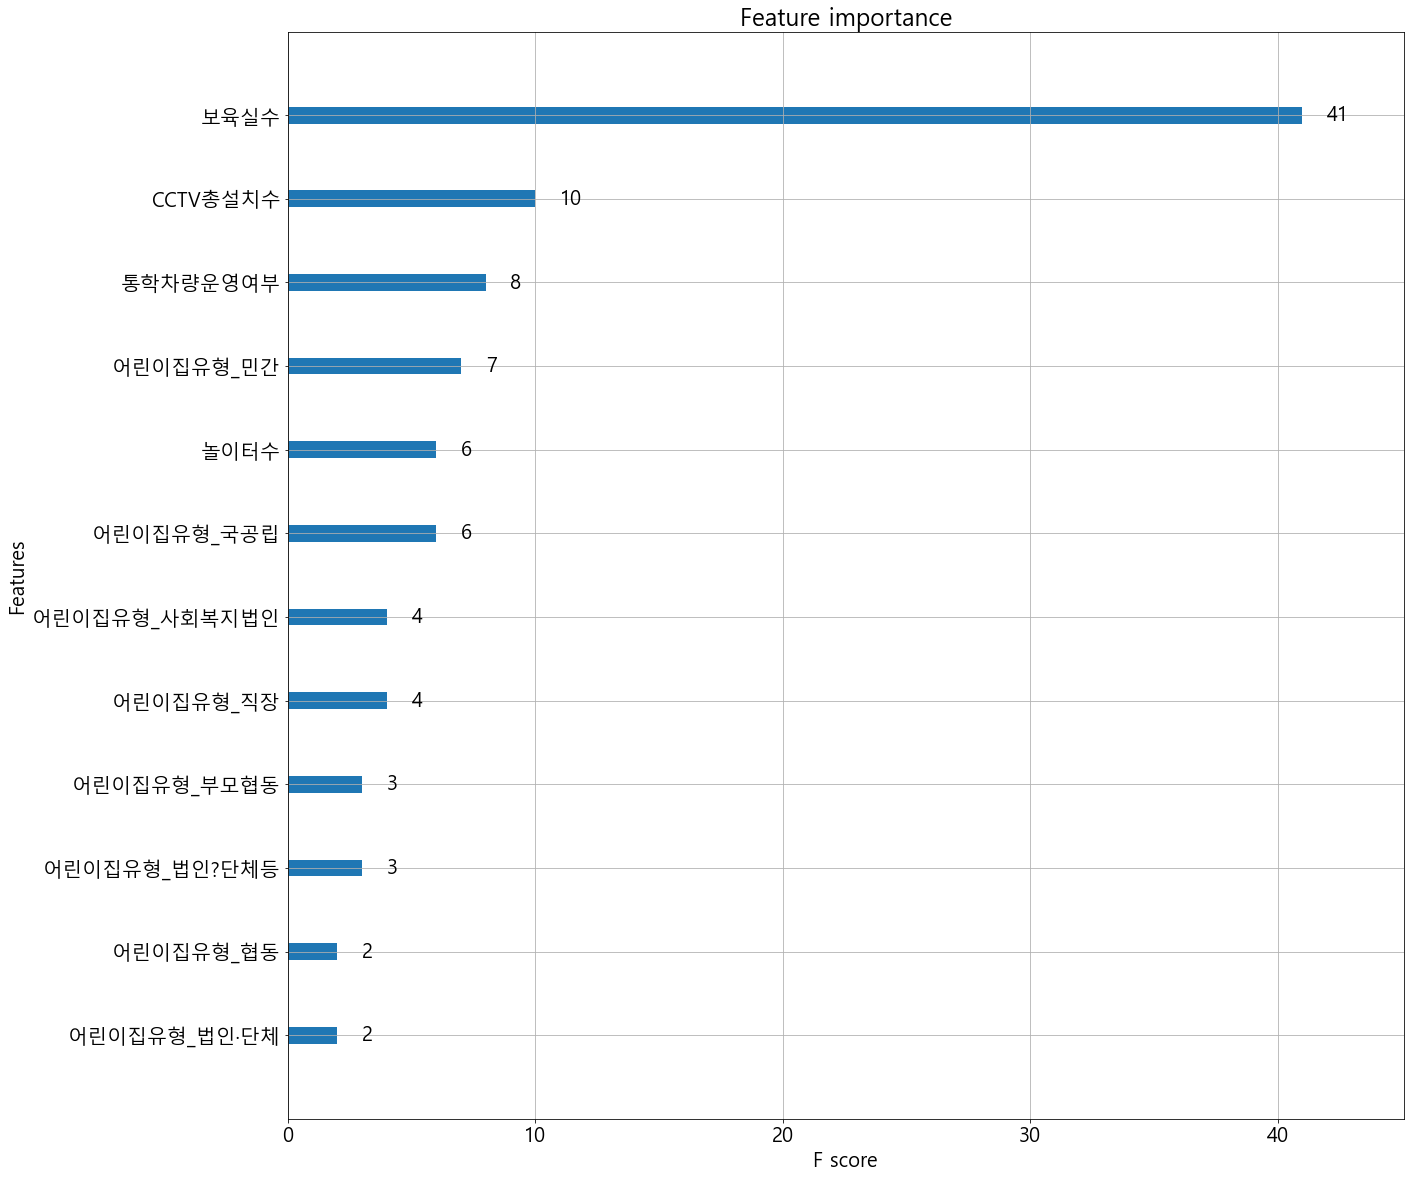

In [61]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #차트의 글꼴을 관리하는 모듈

font_fname = 'C:/Windows/Fonts/malgunsl.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rc('font', family=font_family) #차트 글꼴 지정


plt.figure(figsize=(20,15))
plt.rc('font', size=20)
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [20, 20]
plt.show()